In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
path = '/content/drive/MyDrive/archive/imdb_top_1000.csv'
data = pd.read_csv(path)

data

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [ ]:
print("Before preprocessing - {} rows and {} columns".format(data.shape[0], data.shape[1]))

Before preprocessing - 1000 rows and 16 columns


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB
None


In [ ]:
print(data[['IMDB_Rating','Runtime','Meta_score','No_of_Votes','Gross']].describe())

       IMDB_Rating  Meta_score   No_of_Votes
count  1000.000000  843.000000  1.000000e+03
mean      7.949300   77.971530  2.736929e+05
std       0.275491   12.376099  3.273727e+05
min       7.600000   28.000000  2.508800e+04
25%       7.700000   70.000000  5.552625e+04
50%       7.900000   79.000000  1.385485e+05
75%       8.100000   87.000000  3.741612e+05
max       9.300000  100.000000  2.343110e+06


In [ ]:
#  atrributes data types
for col in data.columns:
    print(f"Column '{col}' has data type: {data[col].dtype}")

Column 'Poster_Link' has data type: object
Column 'Series_Title' has data type: object
Column 'Released_Year' has data type: object
Column 'Certificate' has data type: object
Column 'Runtime' has data type: object
Column 'Genre' has data type: object
Column 'IMDB_Rating' has data type: float64
Column 'Overview' has data type: object
Column 'Meta_score' has data type: float64
Column 'Director' has data type: object
Column 'Star1' has data type: object
Column 'Star2' has data type: object
Column 'Star3' has data type: object
Column 'Star4' has data type: object
Column 'No_of_Votes' has data type: int64
Column 'Gross' has data type: object


# **1**. **DATA** **PREPROCESSING**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [ ]:
# remove duplicate rows
data = data.drop_duplicates()
data

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [ ]:
#list missing data
data.isnull().sum()

,0
Poster_Link,0
Series_Title,0
Released_Year,0
Certificate,101
Runtime,0
Genre,0
IMDB_Rating,0
Overview,0
Meta_score,157
Director,0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<ipython-input-174-6147b19567ca>:5: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




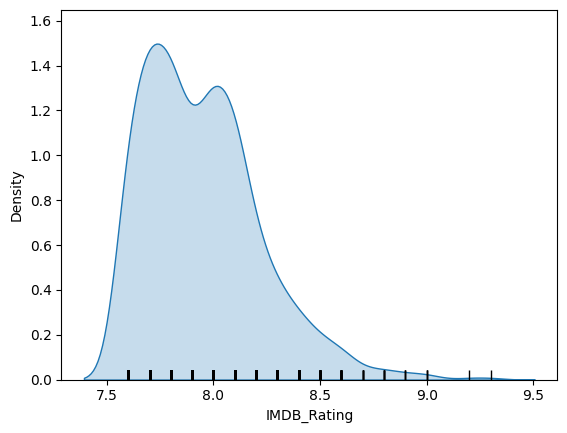

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

# Create the density plot
sns.kdeplot(data['IMDB_Rating'], shade=True)

# Create the rug plot
sns.rugplot(data['IMDB_Rating'], color="black")

# Display the plot
plt.show()


In [ ]:
# numerical columns with missing values
numerical_cols = data.select_dtypes(include=np.number).columns
missing_numerical = data[numerical_cols].isnull().sum()
missing_numerical = missing_numerical[missing_numerical>0]

# filling missing numerical values with the mean of the column
for col in missing_numerical.index:
    data[col].fillna(data[col].mean(), inplace=True)

'''for categorical values'''
# categorical columns with missing values
categorical_cols = data.select_dtypes(exclude=np.number).columns
missing_categorical = data[categorical_cols].isnull().sum()
missing_categorical = missing_categorical[missing_categorical>0]

# filling missing categorical values with 'unknown' as new class
for col in missing_categorical.index:
    data[col].fillna('unknown', inplace=True)

data

<ipython-input-55-f258c0df6414>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)


,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1994,A,142,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,NaN
1,1972,A,175,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,NaN
2,2008,UA,152,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,NaN
3,1974,A,202,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,NaN
4,1957,U,96,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1961,A,115,"Comedy, Drama, Romance",7.6,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,1956,G,201,"Drama, Western",7.6,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,1953,Passed,118,"Drama, Romance, War",7.6,85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,NaN
998,1944,unknown,97,"Drama, War",7.6,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [ ]:
#Un Necessary Columns

print(data.columns)

# Drop only the columns that exist and are intended for removal
# Avoiding repetition and ensuring accuracy with column names
columns_to_drop = ['Poster_Link', 'Series_Title', 'Overview']

# Removing duplicate entries for 'Poster_Link' and 'Series_Title'
valid_columns_to_drop = [col for col in columns_to_drop if col in data.columns]

data.drop(columns=valid_columns_to_drop, axis=1, inplace=True)

Index(['Released_Year', 'Certificate', 'Runtime', 'Genre', 'IMDB_Rating',
       'Meta_score', 'Director', 'Star1', 'Star2', 'Star3', 'Star4',
       'No_of_Votes', 'Gross'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<ipython-input-136-6147b19567ca>:5: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




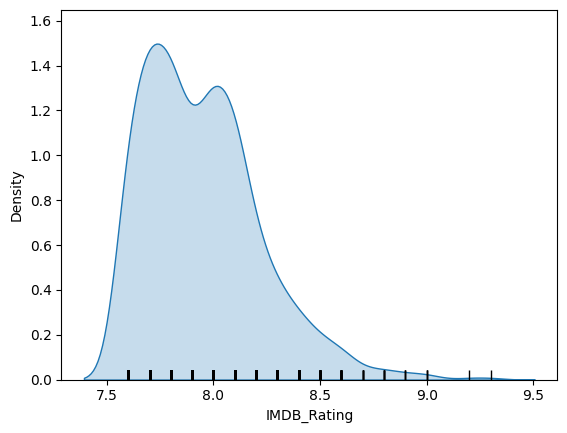

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the density plot
sns.kdeplot(data['IMDB_Rating'], shade=True)

# Create the rug plot
sns.rugplot(data['IMDB_Rating'], color="black")

# Display the plot
plt.show()


In [ ]:
import altair as alt
# Calculate the count of each certificate type
certificate_counts = data['Certificate'].value_counts().reset_index()
certificate_counts.columns = ['Certificate', 'Count']

# Create the doughnut chart
chart = alt.Chart(certificate_counts).mark_arc(innerRadius=50).encode(
    theta='Count',
    color='Certificate',
    tooltip=['Certificate', 'Count']
).properties(
    width=400,
    height=400,
    title="Distribution of Movie Certificates"
)

chart

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/altair/utils/schemapi.py:462: DeprecationWarning:

jsonschema.RefResolver is deprecated as of v4.18.0, in favor of the https://github.com/python-jsonschema/referencing library, which provides more compliant referencing behavior as well as more flexible APIs for customization. A future release will remove RefResolver. Please file a feature request (on referencing) if you are missing an API for the kind of customization you need.

/usr/local/lib/python3.10/dist-packages/altair/utils/schemapi.py:97: DeprecationWarning:

jsonschema.RefResolver is deprecated as of v4.18.0, in favor of the https://github.com/python-jsonschema/refe

alt.Chart(...)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'A'),
  Text(1, 0, 'UA'),
  Text(2, 0, 'U'),
  Text(3, 0, 'PG-13'),
  Text(4, 0, 'R'),
  Text(5, 0, 'unknown'),
  Text(6, 0, 'PG'),
  Text(7, 0, 'G'),
  Text(8, 0, 'Passed'),
  Text(9, 0, 'TV-14'),
  Text(10, 0, '16'),
  Text(11, 0, 'TV-MA'),
  Text(12, 0, 'Unrated'),
  Text(13, 0, 'GP'),
  Text(14, 0, 'Approved'),
  Text(15, 0, 'TV-PG'),
  Text(16, 0, 'U/A')])

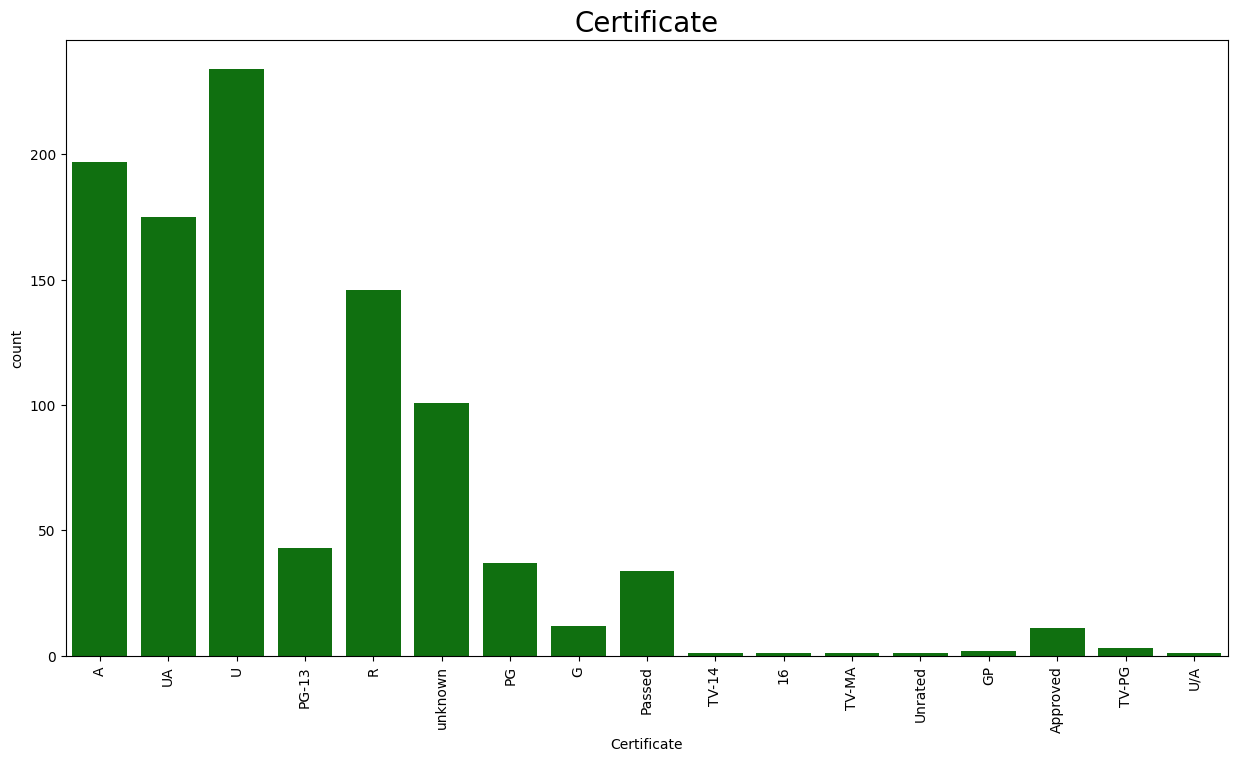

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x='Certificate',color='green',data=data) # Pass 'Certificate' as the 'x' argument
plt.title('Certificate',fontsize=20)
plt.xticks(rotation = 'vertical')

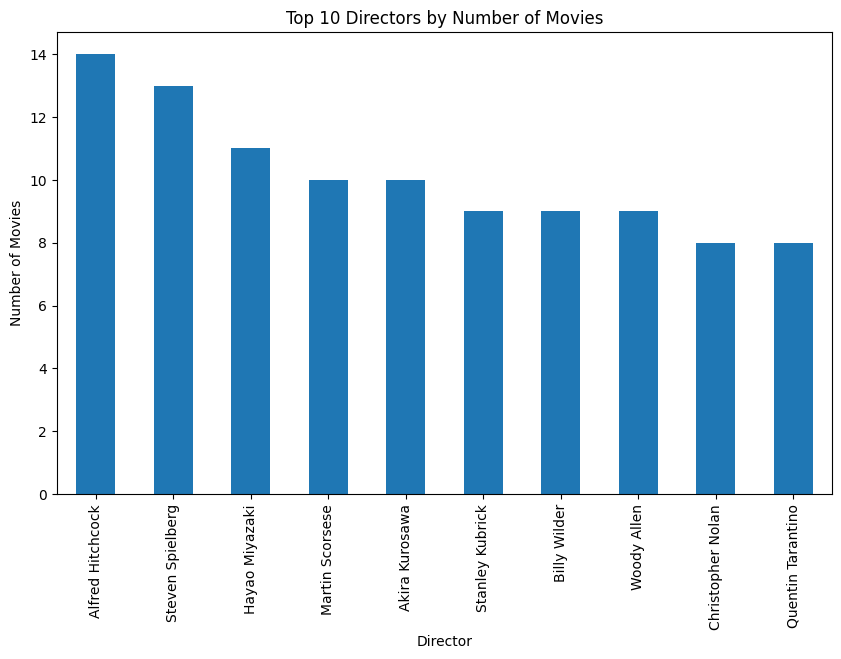

In [ ]:
# 4. Top 10 directors by number of movies
director_counts = data['Director'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
director_counts.plot(kind='bar')
plt.title('Top 10 Directors by Number of Movies')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.show()


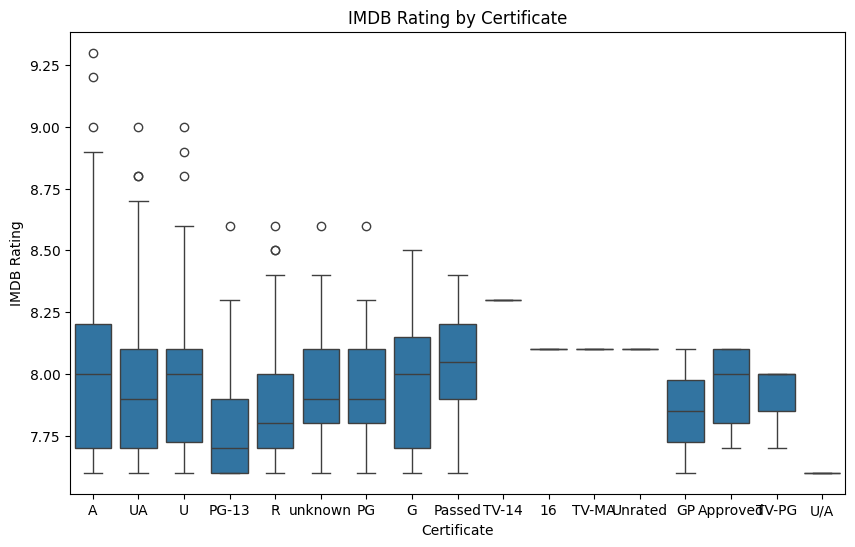

In [ ]:
# Boxplot of IMDB Ratings by Certificate
plt.figure(figsize=(10, 6))
sns.boxplot(x='Certificate', y='IMDB_Rating', data=data)
plt.title('IMDB Rating by Certificate')
plt.xlabel('Certificate')
plt.ylabel('IMDB Rating')
plt.show()

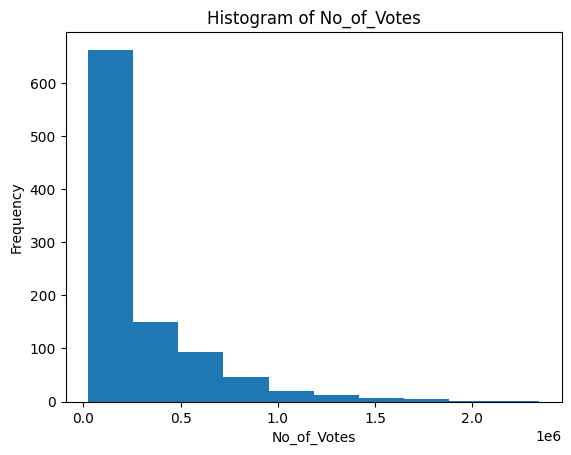

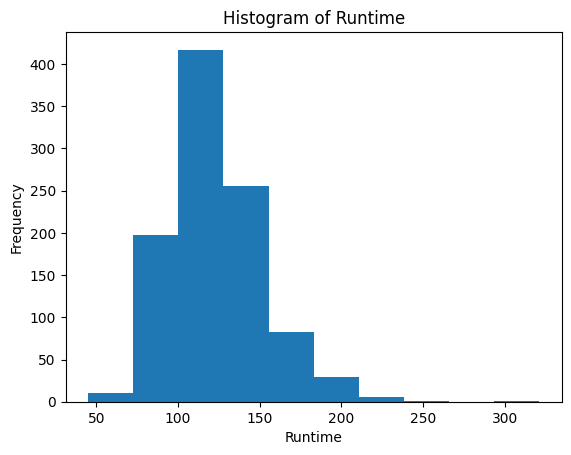

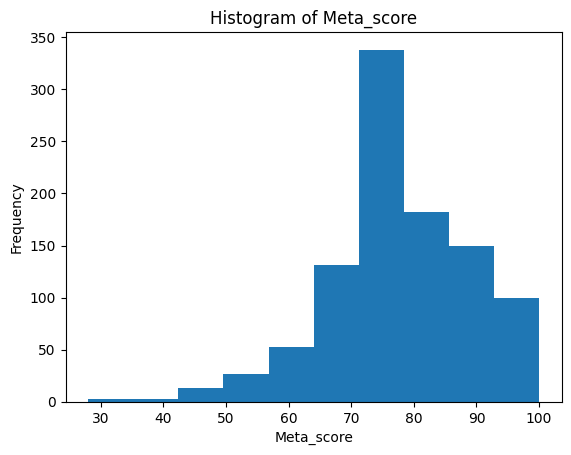

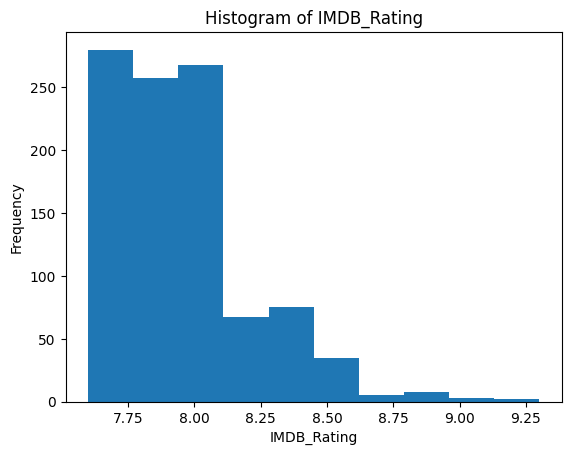

In [ ]:
import matplotlib.pyplot as plt
# Create histograms for specified columns
columns_to_plot = ['No_of_Votes', 'Runtime', 'Meta_score', 'IMDB_Rating']
for col in columns_to_plot:
    plt.figure()  # Create a new figure for each histogram
    plt.hist(data[col].dropna(), bins=10) # dropna handles potential missing values
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

               Released_Year   Runtime  IMDB_Rating  Meta_score  No_of_Votes
Released_Year       1.000000  0.165807    -0.131053   -0.289270     0.241785
Runtime             0.165807  1.000000     0.243096   -0.027794     0.173264
IMDB_Rating        -0.131053  0.243096     1.000000    0.253903     0.494979
Meta_score         -0.289270 -0.027794     0.253903    1.000000    -0.017739
No_of_Votes         0.241785  0.173264     0.494979   -0.017739     1.000000


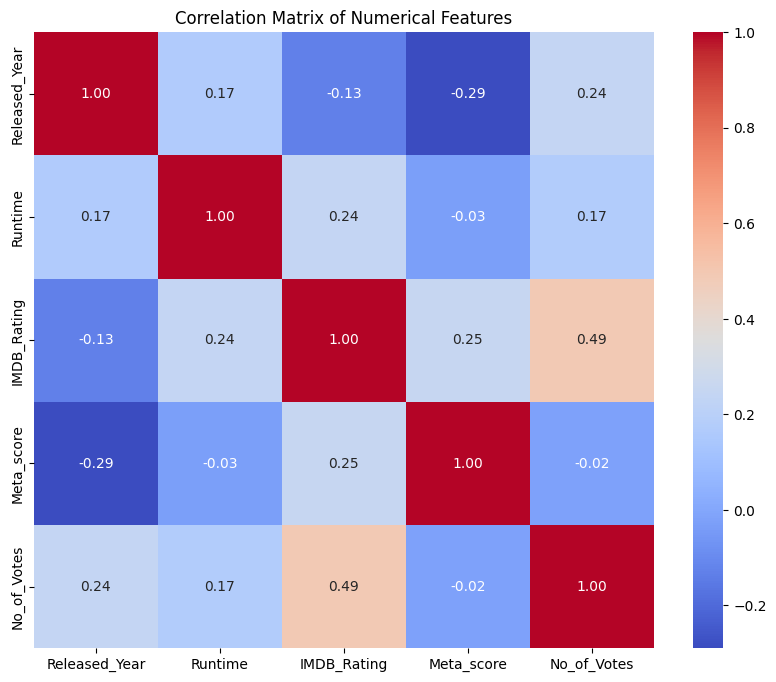

In [ ]:


# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame

# Select numerical columns for correlation analysis
numerical_cols = ['Released_Year', 'Runtime', 'IMDB_Rating', 'Meta_score', 'No_of_Votes']
numerical_data = data[numerical_cols]


# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Print the correlation matrix
print(correlation_matrix)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



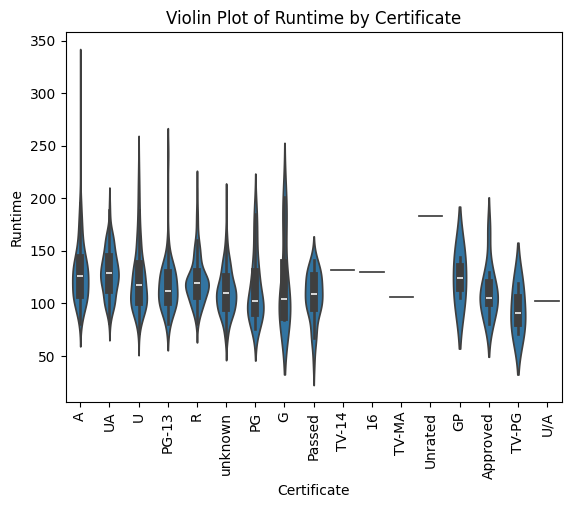

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the violin plot
sns.violinplot(x='Certificate', y='Runtime', data=data)

# Add labels and title
plt.xlabel("Certificate")
plt.ylabel("Runtime")
plt.title("Violin Plot of Runtime by Certificate")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
# Display the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



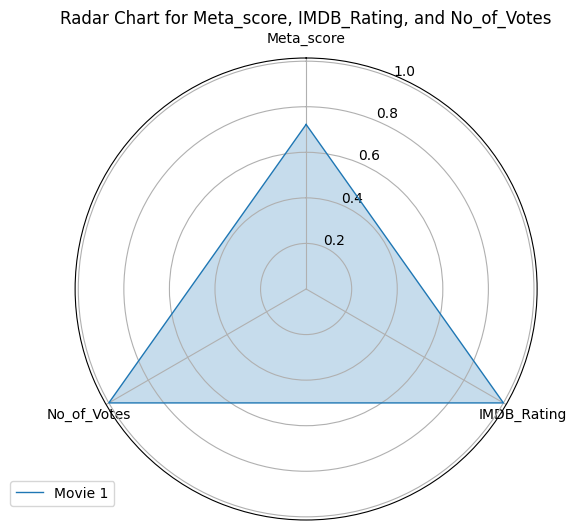

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Select the desired columns
selected_data = data[['Meta_score', 'IMDB_Rating', 'No_of_Votes']]

# Normalize the data (optional, for better visualization)
normalized_data = (selected_data - selected_data.min()) / (selected_data.max() - selected_data.min())

# Number of variables
categories = list(normalized_data.columns)
num_vars = len(categories)

# Create angles for the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Close the plot (connect the last point to the first)
angles += angles[:1]

# Create the figure and axes
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Plot the data for a sample movie (e.g., the first row)
values = normalized_data.iloc[0].tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label='Movie 1')
ax.fill(angles, values, alpha=0.25)

# Set the labels for the categories
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), categories)

# Add a legend
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Display the chart
plt.title('Radar Chart for Meta_score, IMDB_Rating, and No_of_Votes')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



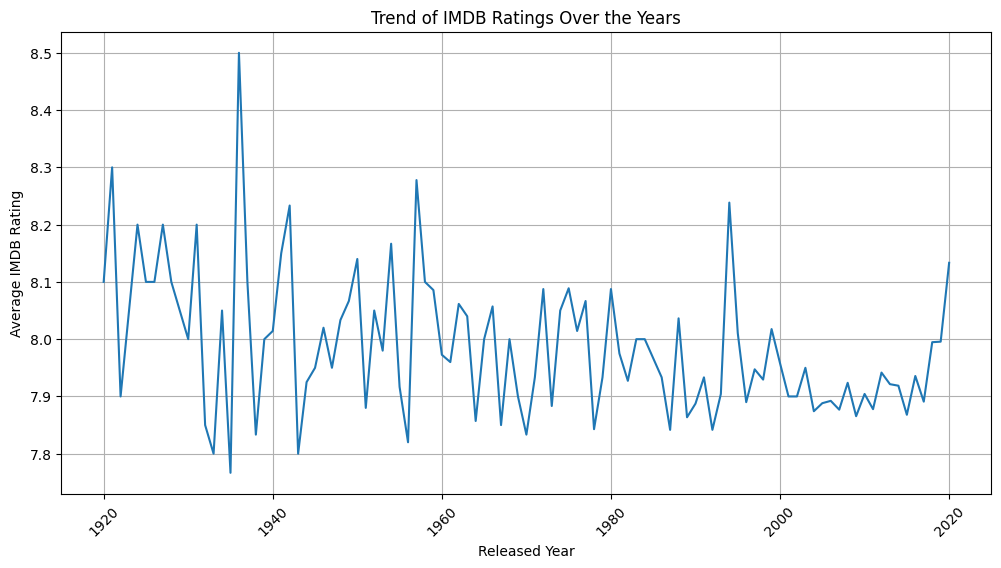

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by 'Released_Year' and calculate the average IMDB rating for each year
average_ratings = data.groupby('Released_Year')['IMDB_Rating'].mean().reset_index()

# Create the line graph
plt.figure(figsize=(12, 6))
sns.lineplot(x='Released_Year', y='IMDB_Rating', data=average_ratings)
plt.title('Trend of IMDB Ratings Over the Years')
plt.xlabel('Released Year')
plt.ylabel('Average IMDB Rating')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add a grid for better visualization
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



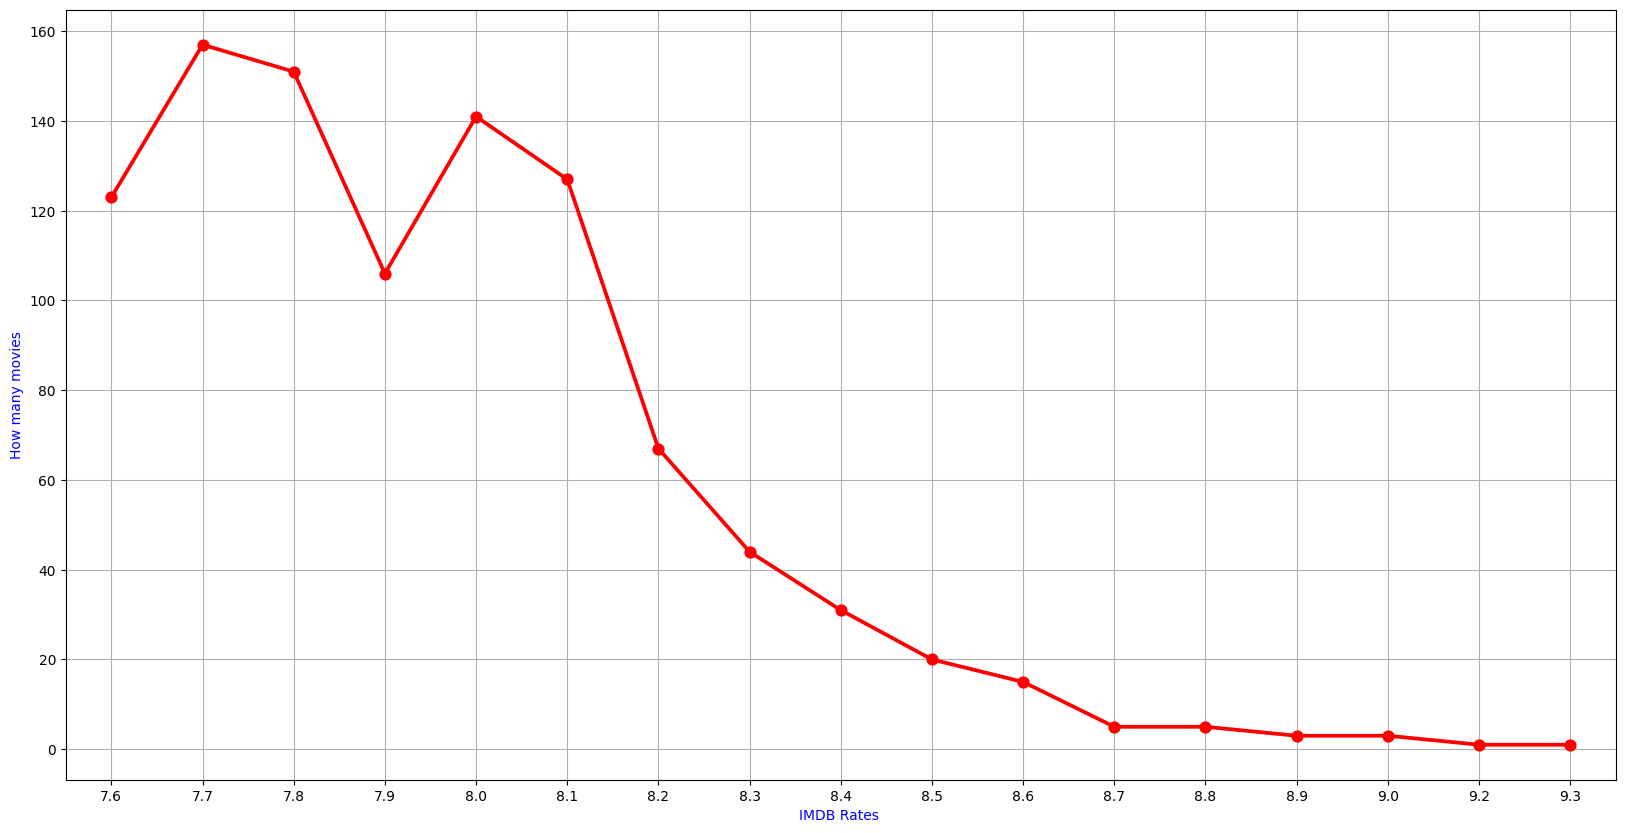

In [ ]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x=data.IMDB_Rating.value_counts().index,y=data.IMDB_Rating.value_counts().values,color='red')

plt.xlabel('IMDB Rates ',color='blue')
plt.ylabel('How many movies',color='blue')
plt.grid()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



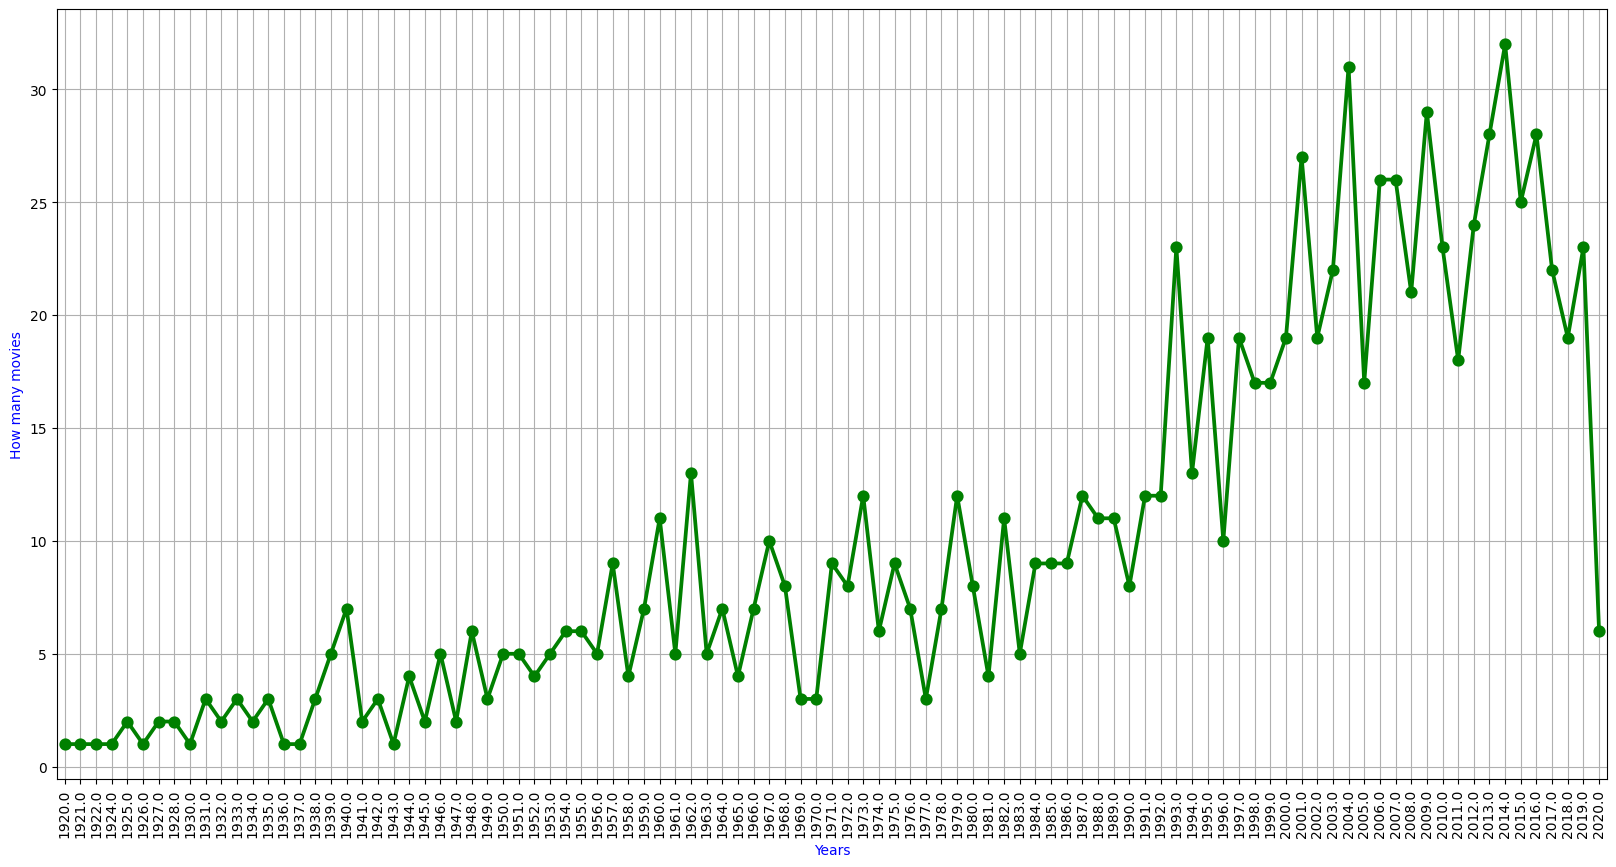

In [ ]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x=data.Released_Year.value_counts().sort_values().index,y=data.Released_Year.value_counts().sort_values().values,color='green')

plt.xlabel('Years',color='blue')
plt.ylabel('How many movies',color='blue')
plt.xticks(rotation=90)
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples.

Accuracy: 0.275
              precision    recall  f1-score   support

           1       0.33      0.13      0.19        39
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00        13
           7       0.00      0.00      0.00         5
           8       0.17      0.10      0.12        21
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         1
          12       0.25      0.28      0.27        54
          14       0.40      0.31      0.35        26
          16       0.27      0.93      0.42        27

    accuracy                           0.28       200
   macro avg       0.12      0.14      0.11       200
weighted avg       0.24      0.28      0.22       200



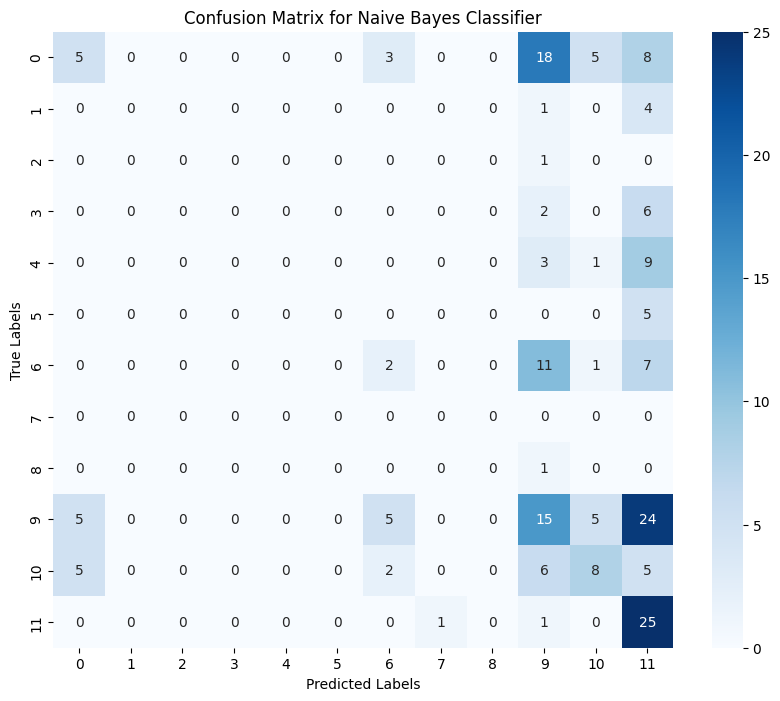

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder

# Select features and target variable
features = ['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Runtime']
target = 'Certificate'

X = data[features]
y = data[target]

# Encode the target variable (Certificate) into numerical labels
le = LabelEncoder()
y = le.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier using the training data
nb_classifier.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test data
y_pred = nb_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print a classification report
print(classification_report(y_test, y_pred))


from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already trained the classifier and obtained y_pred

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Naive Bayes Classifier")
plt.show()

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Load the dataset as a CSV file
file_path = '/content/drive/MyDrive/archive/imdb_top_1000.csv'  # Replace with the actual path
data = pd.read_csv(file_path)

# Extract the 'Genre' column and split it into lists of genres
data['Genre'] = data['Genre'].astype(str).str.split(', ')

# Convert the list of genres into a transactional format
transactions = data['Genre']

# One-hot encode the transactional data
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Apply FP-Growth algorithm with a minimum support of 5%
frequent_itemsets = fpgrowth(df_encoded, min_support=0.05, use_colnames=True)

# Display results
print("Frequent Itemsets:")
print(frequent_itemsets)

print("\nAssociation Rules:")

Frequent Itemsets:
    support                itemsets
0     0.724                 (Drama)
1     0.209                 (Crime)
2     0.189                (Action)
3     0.196             (Adventure)
4     0.109             (Biography)
5     0.056               (History)
6     0.067                (Sci-Fi)
7     0.125               (Romance)
8     0.066               (Fantasy)
9     0.233                (Comedy)
10    0.137              (Thriller)
11    0.082             (Animation)
12    0.056                (Family)
13    0.051                   (War)
14    0.099               (Mystery)
15    0.160          (Crime, Drama)
16    0.077         (Action, Drama)
17    0.055         (Action, Crime)
18    0.083     (Adventure, Action)
19    0.065      (Adventure, Drama)
20    0.054     (Adventure, Comedy)
21    0.103      (Drama, Biography)
22    0.054        (Drama, History)
23    0.106        (Drama, Romance)
24    0.123         (Comedy, Drama)
25    0.083       (Drama, Thriller)
26    0.0

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.preprocessing import TransactionEncoder

# Load the dataset as a CSV file
file_path = '/content/drive/MyDrive/archive/imdb_top_1000.csv'  # Replace with the actual path
data = pd.read_csv(file_path)

# Extract the 'Genre' column and split it into lists of genres
data['Genre'] = data['Genre'].astype(str).str.split(', ')

# Convert the list of genres into a transactional format
transactions = data['Genre']

# One-hot encode the transactional data
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Apply FPGrowth algorithm to find frequent itemsets
frequent_itemsets = fpgrowth(df_encoded, min_support=0.05, use_colnames=True)

# Identify Closed Frequent Itemsets (CFIs)
def is_closed(itemset, all_itemsets):
    """
    Check if an itemset is closed.
    An itemset is closed if there is no superset with the same support.
    """
    for i, row in all_itemsets.iterrows():
        # Check if the current row is a superset with the same support
        if set(itemset).issubset(set(row['itemsets'])) and row['support'] == frequent_itemsets.loc[frequent_itemsets['itemsets'] == itemset, 'support'].values[0]:
            if set(itemset) != set(row['itemsets']):  # Proper superset check
                return False
    return True

closed_itemsets = []
for i, row in frequent_itemsets.iterrows():
    if is_closed(row['itemsets'], frequent_itemsets):
        closed_itemsets.append(row)

# Convert the closed itemsets into a DataFrame
closed_itemsets_df = pd.DataFrame(closed_itemsets)

# Display results
print("Closed Frequent Itemsets (CFIs):")
print(closed_itemsets_df)


Closed Frequent Itemsets (CFIs):
    support                itemsets
0     0.724                 (Drama)
1     0.209                 (Crime)
2     0.189                (Action)
3     0.196             (Adventure)
4     0.109             (Biography)
5     0.056               (History)
6     0.067                (Sci-Fi)
7     0.125               (Romance)
8     0.066               (Fantasy)
9     0.233                (Comedy)
10    0.137              (Thriller)
11    0.082             (Animation)
12    0.056                (Family)
13    0.051                   (War)
14    0.099               (Mystery)
15    0.160          (Crime, Drama)
16    0.077         (Action, Drama)
17    0.055         (Action, Crime)
18    0.083     (Adventure, Action)
19    0.065      (Adventure, Drama)
20    0.054     (Adventure, Comedy)
21    0.103      (Drama, Biography)
22    0.054        (Drama, History)
23    0.106        (Drama, Romance)
24    0.123         (Comedy, Drama)
25    0.083       (Drama, Thril

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

